In [1]:
# Install libraries
print("Installing libraries... wait 2-3 minutes")

import sys
import subprocess

libs = ['tensorflow', 'opencv-python', 'kaggle', 'seaborn', 'scikit-learn']

for lib in libs:
    subprocess.check_call([sys.executable, "-m", "pip", "install", lib, "-q"])

print("Done!")

Installing libraries... wait 2-3 minutes
Done!


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

print("WEEK 1 - SKIN CANCER DETECTION")
print(f"TensorFlow: {tf.__version__}")
print("✅ Libraries loaded!")

C:\Users\aounm\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


WEEK 1 - SKIN CANCER DETECTION
TensorFlow: 2.20.0
✅ Libraries loaded!


In [3]:
# Setup Kaggle folder
import os
from pathlib import Path

home = str(Path.home())
kaggle_dir = os.path.join(home, '.kaggle')

os.makedirs(kaggle_dir, exist_ok=True)

print("Put your kaggle.json file here:")
print(kaggle_dir)

Put your kaggle.json file here:
C:\Users\aounm\.kaggle


In [4]:
# Check if kaggle.json is there
import os
from pathlib import Path
import json

kaggle_file = os.path.join(str(Path.home()), '.kaggle', 'kaggle.json')

if os.path.exists(kaggle_file):
    with open(kaggle_file) as f:
        config = json.load(f)
    print(f"✅ Found! Username: {config['username']}")
    print("Ready to download!")
else:
    print("❌ kaggle.json not found")

✅ Found! Username: aunmustansarhussain
Ready to download!


In [5]:
import kaggle
import zipfile

print("Downloading... please wait 3-5 minutes")

# Download
kaggle.api.dataset_download_files(
    'hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images',
    path='data',
    unzip=True
)

print("✅ Done!")

Downloading... please wait 3-5 minutes
Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
✅ Done!


In [6]:
import os

print("📁 What's in the data folder:")

for item in os.listdir('data'):
    print(f"  - {item}")
    
    # If it's a folder, check what's inside
    path = os.path.join('data', item)
    if os.path.isdir(path):
        files = os.listdir(path)
        print(f"    ({len(files)} items inside)")

📁 What's in the data folder:
  - melanoma_cancer_dataset
    (3 items inside)


In [7]:
import os

# Check inside the melanoma folder
path = 'data/melanoma_cancer_dataset'

print("📁 Inside melanoma_cancer_dataset:")
for item in os.listdir(path):
    print(f"  - {item}")
    
    # Check what's inside each subfolder
    subfolder = os.path.join(path, item)
    if os.path.isdir(subfolder):
        num_images = len(os.listdir(subfolder))
        print(f"    ({num_images} images)")

📁 Inside melanoma_cancer_dataset:
  - test
    (2 images)
  - train
    (2 images)
  - val
    (2 images)


In [16]:
import os

# Check train
train = 'data/melanoma_cancer_dataset/train'
print("TRAIN:")
for item in os.listdir(train):
    count = len(os.listdir(os.path.join(train, item)))
    print(f"  {item}: {count} images")

# Check test
test = 'data/melanoma_cancer_dataset/test'
print("\nTEST:")
for item in os.listdir(test):
    count = len(os.listdir(os.path.join(test, item)))
    print(f"  {item}: {count} images")

# Check validation
validation = 'data/melanoma_cancer_dataset/val'
print("\nVALIDATION:")
for item in os.listdir(validation):
    count = len(os.listdir(os.path.join(validation, item)))
    print(f"  {item}: {count} images")

TRAIN:
  benign: 5000 images
  malignant: 4605 images

TEST:
  benign: 500 images
  malignant: 500 images

VALIDATION:
  benign: 1926 images
  malignant: 1782 images


Train: 5000 benign, 4605 malignant


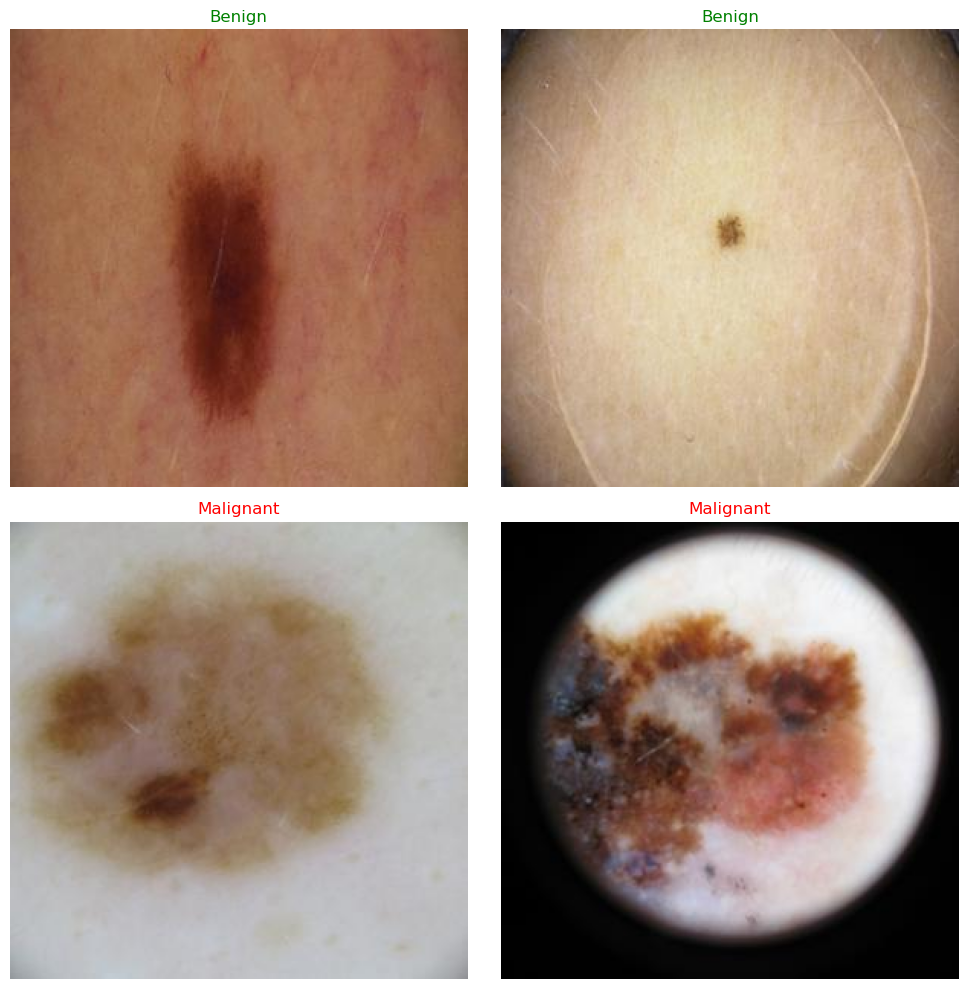

In [17]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# Count images
tb = len(os.listdir('data/melanoma_cancer_dataset/train/benign'))
tm = len(os.listdir('data/melanoma_cancer_dataset/train/malignant'))
print(f"Train: {tb} benign, {tm} malignant")

# Show 4 images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 2 benign
b_dir = 'data/melanoma_cancer_dataset/train/benign'
for i in range(2):
    img = cv2.imread(os.path.join(b_dir, random.choice(os.listdir(b_dir))))
    axes[0, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title("Benign", color='green')
    axes[0, i].axis('off')

# 2 malignant  
m_dir = 'data/melanoma_cancer_dataset/train/malignant'
for i in range(2):
    img = cv2.imread(os.path.join(m_dir, random.choice(os.listdir(m_dir))))
    axes[1, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title("Malignant", color='red')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [18]:
import os
import shutil
import random

# Create val folders
val = 'data/melanoma_cancer_dataset/val'
os.makedirs(val + '/benign', exist_ok=True)
os.makedirs(val + '/malignant', exist_ok=True)

train = 'data/melanoma_cancer_dataset/train'

# Move 15% to validation
for cls in ['benign', 'malignant']:
    imgs = os.listdir(os.path.join(train, cls))
    move_imgs = random.sample(imgs, int(len(imgs) * 0.15))
    
    for img in move_imgs:
        shutil.move(f'{train}/{cls}/{img}', f'{val}/{cls}/{img}')
    
    print(f"{cls}: moved {len(move_imgs)}")

print("✅ Done!")

benign: moved 750
malignant: moved 690
✅ Done!
